# 입지분석이란?
## 입지에 영향을 미치는 범위 내의 입지 구성요소를 정성적, 정량적 방법으로 측정함으로써 환경을 이해하고 최적의 목표가 달성될 수 있도록 위치적 조건을 분석하는 과정

In [69]:
# library
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn import preprocessing

# data
data = pd.read_csv("C:/폐교/경남total.csv")
data.head()

,65세이상 1인가구,city,인프라,popul_old,station,경도인지장애환자수
0,5241,거제시,204,"23,863",665,5711.13
1,4599,거창군,98,"15,966",337,4080.52
2,4134,고성군,72,"14,813",357,3734.82
3,12296,김해시,524,"56,571",787,13178.87
4,4502,남해군,65,"15,169",246,3915.61


In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   65세이상 1인가구  18 non-null     int64  
 1   city        18 non-null     object 
 2   인프라         18 non-null     int64  
 3   popul_old   18 non-null     object 
 4   station     18 non-null     int64  
 5   경도인지장애환자수   18 non-null     float64
dtypes: float64(1), int64(3), object(2)
memory usage: 992.0+ bytes


In [71]:
def to_int(popul_old):
    popul_old = popul_old.replace(',','')
    popul_old = int(popul_old)
    return popul_old

In [72]:
old_int = data.popul_old.apply(to_int)
old_int.head()

0    23863
1    15966
2    14813
3    56571
4    15169
Name: popul_old, dtype: int64

In [73]:
data.insert(3, 'old_int',old_int)
data.head()

,65세이상 1인가구,city,인프라,old_int,popul_old,station,경도인지장애환자수
0,5241,거제시,204,23863,"23,863",665,5711.13
1,4599,거창군,98,15966,"15,966",337,4080.52
2,4134,고성군,72,14813,"14,813",357,3734.82
3,12296,김해시,524,56571,"56,571",787,13178.87
4,4502,남해군,65,15169,"15,169",246,3915.61


In [74]:
# 원본 데이터를 복사해서 전처리하기
processed_data = data.copy()

In [75]:
processed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   65세이상 1인가구  18 non-null     int64  
 1   city        18 non-null     object 
 2   인프라         18 non-null     int64  
 3   old_int     18 non-null     int64  
 4   popul_old   18 non-null     object 
 5   station     18 non-null     int64  
 6   경도인지장애환자수   18 non-null     float64
dtypes: float64(1), int64(4), object(2)
memory usage: 1.1+ KB


In [85]:
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
import matplotlib as mpl
import matplotlib.font_manager as fm
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 10

In [83]:
data_1=processed_data[['인프라', 'station', '경도인지장애환자수','65세이상 1인가구','popul_old']]
data_1.head()

,인프라,station,경도인지장애환자수,65세이상 1인가구,popul_old
0,204,665,5711.13,5241,"23,863"
1,98,337,4080.52,4599,"15,966"
2,72,357,3734.82,4134,"14,813"
3,524,787,13178.87,12296,"56,571"
4,65,246,3915.61,4502,"15,169"


C:\Users\CPB06GameN\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\CPB06GameN\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\CPB06GameN\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\CPB06GameN\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\CPB06GameN\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\CPB06GameN\miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance;

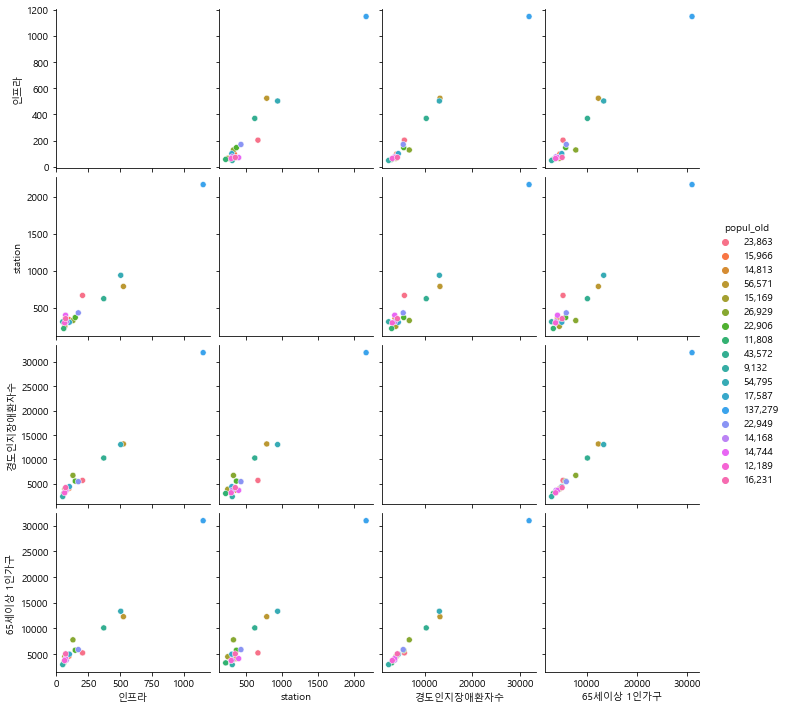

In [86]:
sns.pairplot(data_1, hue='popul_old')
plt.show()

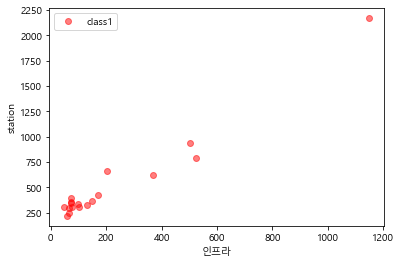

In [92]:
# 2차원 그리기
fig = plt.plot(figsize=(5,5))
X = data_1

plt.plot(X['인프라'],X['station'],'o',color='red',alpha=0.5,label='class1')
plt.xlabel('인프라')
plt.ylabel('station')

plt.legend()
plt.show()

C:\Users\CPB06GameN\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


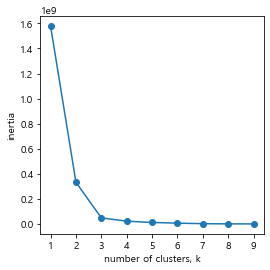

In [94]:
# 적절한 군집수 찾기
# Inertia(군집 내 거리제곱합의 합) value(적정 군집수)

ks=range(1,10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(data_1.iloc[:,:-1])
    inertias.append(model.inertia_)

# plot ks vs inertias
plt.figure(figsize=(4,4))

plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

## k개수가 3에서 완만하게 변하기 때문에 군집을 3개로 하면 적당할 듯

In [96]:
# K-Means 모델과 군집 예측값 생성
clust_model = KMeans(n_clusters=3,n_init=5, max_iter=100,random_state=42, algorithm='auto')

# 생성할 모델로 데이터 학습
clust_model.fit(data_1.iloc[:,:-1])

# 결과 값을 변수에 저장
centers = clust_model.cluster_centers_ #각 군집의 중심점
pred = clust_model.predict(data_1.iloc[:,:-1]) # 각 예측군집

print(pd.DataFrame(centers))
print(pred[:10])

             0       1             2             3
0    98.357143   350.0   4275.950714   4712.000000
1  1148.000000  2167.0  31889.240000  30993.000000
2   465.666667   782.0  12178.450000  11920.666667
[0 0 0 2 0 0 0 0 2 0]


In [97]:
# 원래 데이터에 예측된 군집 붙이기
clust_df = data_1.copy()
clust_df['clust'] = pred
clust_df.head()

,인프라,station,경도인지장애환자수,65세이상 1인가구,popul_old,clust
0,204,665,5711.13,5241,"23,863",0
1,98,337,4080.52,4599,"15,966",0
2,72,357,3734.82,4134,"14,813",0
3,524,787,13178.87,12296,"56,571",2
4,65,246,3915.61,4502,"15,169",0


## 여기서 target의 번화와 clust의 번호가 다른것은 군집이 잘못나온게 아니라 넘버링된 번호가 다를 뿐.
스케일링한 후 아래에서 잘 묶여나왔는지 확인해볼 예정

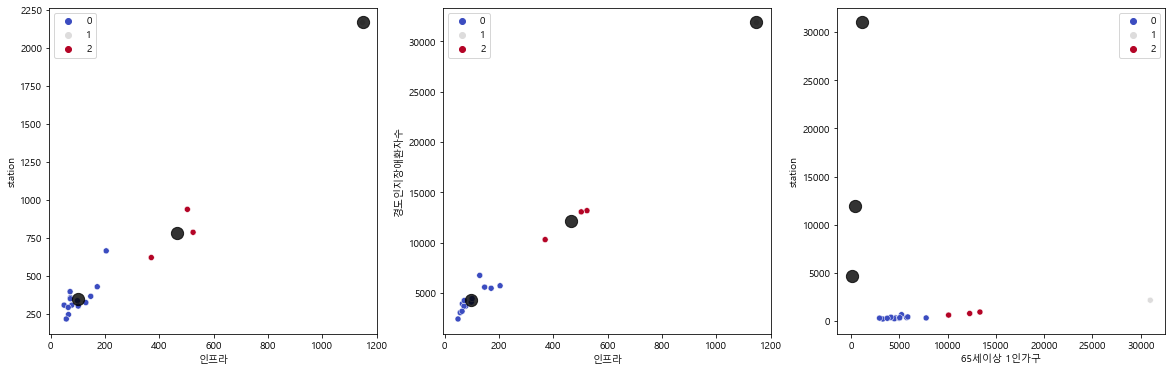

In [100]:
# 군집분석 결과를 가지고 시각화 하기
# scaling하지 않은 ㄷ이터를 학습하고 시각화

plt.figure(figsize=(20,6))

X = clust_df

plt.subplot(131) #grid형태의 Axes 객체 생성
sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,1],data=data_1, hue=clust_model.labels_, palette='coolwarm')
plt.scatter(centers[:,0],centers[:,1],c='black',alpha=0.8, s=150)

plt.subplot(132)
sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,2],data=data_1, hue=clust_model.labels_, palette='coolwarm')
plt.scatter(centers[:,0],centers[:,2],c='black',alpha=0.8, s=150)

plt.subplot(133)
sns.scatterplot(x=X.iloc[:,3], y=X.iloc[:,1],data=data_1, hue=clust_model.labels_, palette='coolwarm')
plt.scatter(centers[:,0],centers[:,3],c='black',alpha=0.8, s=150)

## #스케일링을 하지 않으니 3번째 plot이 잘 분류되지 않음

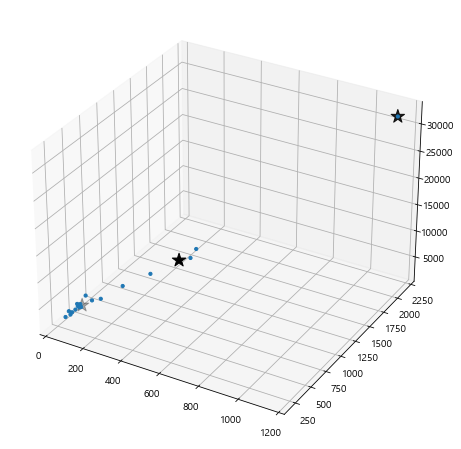

In [101]:
# 3차원으로 시각화하기
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

X = clust_df

# 데이터 scatterplot
ax.scatter(X.iloc[:,0], X.iloc[:,1],X.iloc[:,2], s=10, cmap="rainbow", alpha=1)

# centroid scatterplot
ax.scatter(centers[:,0],centers[:,1],centers[:,2],c='black',s=200, marker='*')

plt.show()

In [102]:
# 군집 별 특징 확인하기
clust_mean = clust_df.groupby('clust').mean()
clust_mean

,인프라,station,경도인지장애환자수,65세이상 1인가구
clust,,,,
0,98.357143,350.0,4275.950714,4712.000000
1,1148.000000,2167.0,31889.240000,30993.000000
2,465.666667,782.0,12178.450000,11920.666667


## #스케일링 후 다시 군집분석
변수 별로 편차가 크기 때문에 스케일링 필요

In [103]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
scaled_df = pd.DataFrame(standard_scaler.fit_transform(data_1.iloc[:,0:4]), columns=data_1.iloc[:,0:4].columns)

In [104]:
# 모델 만든 후 예측
# clust_model은 스케일링 전 fit과 동일
clust_model.fit(scaled_df)

center_s = clust_model.cluster_centers_
pred_s = clust_model.predict(scaled_df)

In [105]:
# 스케일링 전에 합쳐준 데이터프레임에 스케일링한 군집 칼럼 추가
clust_df['clust_s'] = pred_s
clust_df

,인프라,station,경도인지장애환자수,65세이상 1인가구,popul_old,clust,clust_s
0,204,665,5711.13,5241,"23,863",0,0
1,98,337,4080.52,4599,"15,966",0,0
2,72,357,3734.82,4134,"14,813",0,0
3,524,787,13178.87,12296,"56,571",2,2
4,65,246,3915.61,4502,"15,169",0,0
5,129,325,6739.28,7787,"26,929",0,0
6,147,366,5571.90,5766,"22,906",0,0
7,57,217,3039.05,3297,"11,808",0,0
8,370,621,10298.98,10111,"43,572",2,2
9,49,308,2406.09,2962,"9,132",0,0


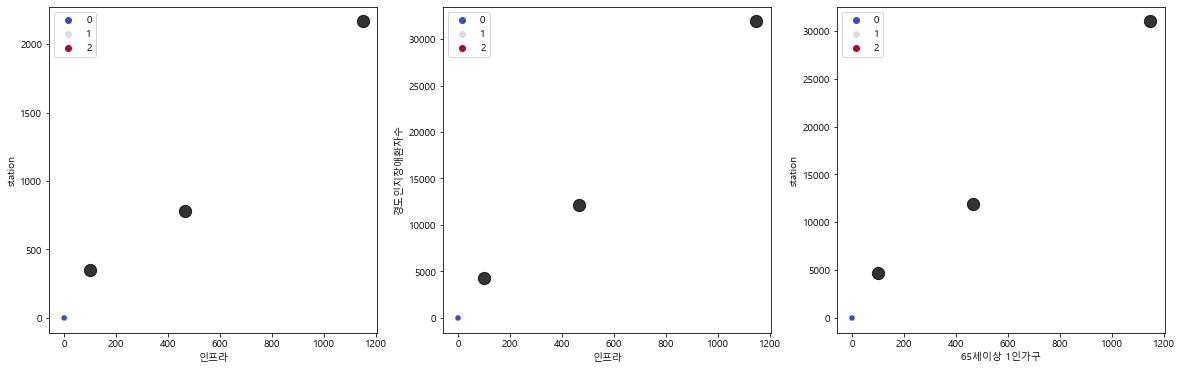

In [106]:
# scaling 완료한 데이터 학습 후 시각화
plt,plt.figure(figsize=(20,6))

X = scaled_df

plt.subplot(131) #grid형태의 Axes 객체 생성
sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,1],data=scaled_df, hue=clust_model.labels_, palette='coolwarm')
plt.scatter(centers[:,0],centers[:,1],c='black',alpha=0.8, s=150)

plt.subplot(132)
sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,2],data=scaled_df, hue=clust_model.labels_, palette='coolwarm')
plt.scatter(centers[:,0],centers[:,2],c='black',alpha=0.8, s=150)

plt.subplot(133)
sns.scatterplot(x=X.iloc[:,3], y=X.iloc[:,1],data=scaled_df, hue=clust_model.labels_, palette='coolwarm')
plt.scatter(centers[:,0],centers[:,3],c='black',alpha=0.8, s=150)

plt.show()

In [108]:
# 스케일링 한 데이터와 안한 데이터 군집 성능 비교
pd.crosstab(clust_df['popul_old'],clust_df['clust']) #bf scaling

clust,0,1,2
popul_old,,,
"11,808",1,0,0
"12,189",1,0,0
"137,279",0,1,0
"14,168",1,0,0
"14,744",1,0,0
"14,813",1,0,0
"15,169",1,0,0
"15,966",1,0,0
"16,231",1,0,0


In [109]:
pd.crosstab(clust_df['popul_old'],clust_df['clust_s']) #af scaling

clust_s,0,1,2
popul_old,,,
"11,808",1,0,0
"12,189",1,0,0
"137,279",0,1,0
"14,168",1,0,0
"14,744",1,0,0
"14,813",1,0,0
"15,169",1,0,0
"15,966",1,0,0
"16,231",1,0,0


# 흠.. 뭐지 여튼 정규화 전이나 후나 같은데.. 어디서부터... 잘못되건지..?

###################################################

In [45]:
# 데이터 전처리 - 정규화를 위한 작업
scaler = preprocessing.MinMaxScaler()
processed_data= scaler.fit_transform(processed_data[['old_int','station']])

In [53]:
# feature&target
X = data['old_int']
y = data['station']

In [49]:
# setup a figure. You can maniplate the numbers to adjust size
plt.figure(figsize=(10,10))

# iterate them to test K values 
for i in range(1,7):
    # create cluster
    estimator = KMeans(n_cluster = i)
    ids = estimator.fit_predict(processed_data[['old_int','station']])

    # add a subplot with 2 rows and 3 columns (index = i)
    plt.subplot(3,2,i)
    plt.tight_layout()
    
    # labeling the subplot
    plt.title("K value = {}".format(i))
    plt.xlabel('65세 이상 인구')
    plt.ylabel('교통접근성')
    
    # plot the scatters
    plt.scatter(processed_data['old_int'], processed_data['station'], c=ids)  

# show the figure
plt.show()

TypeError: __init__() got an unexpected keyword argument 'n_cluster'

<Figure size 720x720 with 0 Axes>

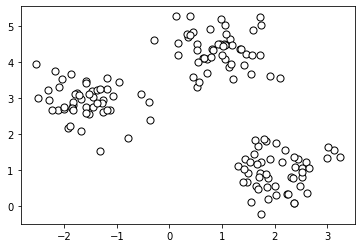

In [ ]:
# create dataset
X, y = make_blobs(
   n_samples=150, n_features=2,
   centers=3, cluster_std=0.5,
   shuffle=True, random_state=0
)

# plot
plt.scatter(
   X[:, 0], X[:, 1],
   c='white', marker='o',
   edgecolor='black', s=50
)
plt.show()